In [1]:
!pip install ujson

import os
import ujson as json 
import random
import pandas as pd


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
root_folder = "31xxx"  

In [3]:
json_files = []
for root, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith(".json"):
            json_files.append(os.path.join(root, file))


In [4]:


records = []

for file_path in json_files:
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        cve_id = data["cveMetadata"]["cveId"]
        date = data["cveMetadata"].get("datePublished", "")

        cna = data["containers"]["cna"]
        title = cna.get("title", "")
        
        descriptions = cna.get("descriptions", [])
        description = next((d["value"] for d in descriptions if d.get("lang") == "en"), "")

        cvss_v3_1 = next((m["cvssV3_1"]["baseScore"]
                          for m in cna.get("metrics", [])
                          if "cvssV3_1" in m), "")

        # Affected
        vendor = product = version = ""
        affected = cna.get("affected", [])
        if affected:
            aff = affected[0]
            vendor = aff.get("vendor", "")
            product = aff.get("product", "")
            versions = aff.get("versions", [])
            if versions:
                version = versions[0].get("version", "")

        records.append({
            "CVE ID": cve_id,
            "Title": title,
            "Description": description,
            "CVSS v3.1 Score": cvss_v3_1,
            "Vendor": vendor,
            "Product": product,
            "datePublished": date,
            
        })

    except Exception as e:
        print(f"⚠️ Error processing {file_path}: {e}")


In [5]:
df = pd.DataFrame(records)
df.head(120)

,CVE ID,Title,Description,CVSS v3.1 Score,Vendor,Product,datePublished
0,CVE-2023-1258,Flow-X disclosure of sensitive information to ...,Exposure of Sensitive Information to an Unauth...,5.3,ABB,Flow-X,2023-03-31T07:56:05.133Z
1,CVE-2023-1389,,TP-Link Archer AX21 (AX1800) firmware versions...,,n/a,TP-Link Archer AX21 (AX1800),2023-03-15T00:00:00.000Z
2,CVE-2023-1545,SQL Injection in nilsteampassnet/teampass,SQL Injection in GitHub repository nilsteampas...,,nilsteampassnet,nilsteampassnet/teampass,2023-03-21T00:00:00.000Z
3,CVE-2023-1671,,A pre-auth command injection vulnerability in ...,9.8,Sophos,Sophos Web Appliance,2023-04-04T00:00:00.000Z
4,CVE-2023-1826,SourceCodester Online Computer and Laptop Stor...,"A vulnerability, which was classified as criti...",6.3,SourceCodester,Online Computer and Laptop Store,2023-04-04T09:00:05.968Z
...,...,...,...,...,...,...,...
115,CVE-2024-24494,,Cross Site Scripting vulnerability in Daily Ha...,,n/a,n/a,2024-02-08T00:00:00
116,CVE-2024-24495,,SQL Injection vulnerability in delete-tracker....,,n/a,n/a,2024-02-08T00:00:00
117,CVE-2024-24496,,An issue in Daily Habit Tracker v.1.0 allows a...,,n/a,n/a,2024-02-08T00:00:00
118,CVE-2024-24497,,,,,,


In [6]:

!pip install openpyxl

import pandas as pd

exploitation_df = pd.read_excel("EPSS-DATA.xlsx")  

merged_df = pd.merge(df, exploitation_df, on="CVE ID", how="left")

merged_df.to_csv("merged_cve_data.csv", index=False)

merged_df.head(120)


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


,CVE ID,Title,Description,CVSS v3.1 Score,Vendor,Product,datePublished,Attempted Exploitation,Reference,CWE,CWE-N
0,CVE-2023-1258,Flow-X disclosure of sensitive information to ...,Exposure of Sensitive Information to an Unauth...,5.3,ABB,Flow-X,2023-03-31T07:56:05.133Z,yes,2.0,CWE-200,1.0
1,CVE-2023-1389,,TP-Link Archer AX21 (AX1800) firmware versions...,,n/a,TP-Link Archer AX21 (AX1800),2023-03-15T00:00:00.000Z,yes,2.0,CWE-77,1.0
2,CVE-2023-1545,SQL Injection in nilsteampassnet/teampass,SQL Injection in GitHub repository nilsteampas...,,nilsteampassnet,nilsteampassnet/teampass,2023-03-21T00:00:00.000Z,yes,2.0,CWE-89,1.0
3,CVE-2023-1671,,A pre-auth command injection vulnerability in ...,9.8,Sophos,Sophos Web Appliance,2023-04-04T00:00:00.000Z,yes,2.0,CWE-77,1.0
4,CVE-2023-1826,SourceCodester Online Computer and Laptop Stor...,"A vulnerability, which was classified as criti...",6.3,SourceCodester,Online Computer and Laptop Store,2023-04-04T09:00:05.968Z,yes,3.0,CWE-434,1.0
...,...,...,...,...,...,...,...,...,...,...,...
115,CVE-2024-24409,Privilege Escalation,Zohocorp ManageEngine ADManager Plus versions ...,8.8,ManageEngine,ADManager Plus,2024-11-08T08:01:12.844Z,yes,1.0,CWE-269,1.0
116,CVE-2024-24494,,Cross Site Scripting vulnerability in Daily Ha...,,n/a,n/a,2024-02-08T00:00:00,yes,1.0,CWE-79,1.0
117,CVE-2024-24495,,SQL Injection vulnerability in delete-tracker....,,n/a,n/a,2024-02-08T00:00:00,yes,1.0,CWE-89,1.0
118,CVE-2024-24496,,An issue in Daily Habit Tracker v.1.0 allows a...,,n/a,n/a,2024-02-08T00:00:00,yes,1.0,CWE-287,2.0


In [7]:
import pandas as pd


main_df = pd.read_csv("merged_cve_data.csv") 

epss_df = pd.read_csv("epss_scores-2025-04-22.csv.gz", compression="gzip", skiprows=1)
print(epss_df.head())
print(epss_df.columns)

epss_df.rename(columns={'cve': 'CVE ID', 'epss': 'EPSS score'}, inplace=True)

full_df = pd.merge(main_df, epss_df[['CVE ID', 'EPSS score']], on='CVE ID', how='left')
full_df.to_csv("cve_data_with_epss.csv", index=False)
full_df.head(120)


             cve     epss  percentile
0  CVE-1999-0001  0.01297     0.78580
1  CVE-1999-0002  0.16835     0.94533
2  CVE-1999-0003  0.89923     0.99528
3  CVE-1999-0004  0.04150     0.88013
4  CVE-1999-0005  0.31026     0.96435
Index(['cve', 'epss', 'percentile'], dtype='object')


,CVE ID,Title,Description,CVSS v3.1 Score,Vendor,Product,datePublished,Attempted Exploitation,Reference,CWE,CWE-N,EPSS score
0,CVE-2023-1258,Flow-X disclosure of sensitive information to ...,Exposure of Sensitive Information to an Unauth...,5.3,ABB,Flow-X,2023-03-31T07:56:05.133Z,yes,2.0,CWE-200,1.0,0.07024
1,CVE-2023-1389,NaN,TP-Link Archer AX21 (AX1800) firmware versions...,NaN,NaN,TP-Link Archer AX21 (AX1800),2023-03-15T00:00:00.000Z,yes,2.0,CWE-77,1.0,0.94149
2,CVE-2023-1545,SQL Injection in nilsteampassnet/teampass,SQL Injection in GitHub repository nilsteampas...,NaN,nilsteampassnet,nilsteampassnet/teampass,2023-03-21T00:00:00.000Z,yes,2.0,CWE-89,1.0,0.11418
3,CVE-2023-1671,NaN,A pre-auth command injection vulnerability in ...,9.8,Sophos,Sophos Web Appliance,2023-04-04T00:00:00.000Z,yes,2.0,CWE-77,1.0,0.94317
4,CVE-2023-1826,SourceCodester Online Computer and Laptop Stor...,"A vulnerability, which was classified as criti...",6.3,SourceCodester,Online Computer and Laptop Store,2023-04-04T09:00:05.968Z,yes,3.0,CWE-434,1.0,0.00766
...,...,...,...,...,...,...,...,...,...,...,...,...
115,CVE-2024-24409,Privilege Escalation,Zohocorp ManageEngine ADManager Plus versions ...,8.8,ManageEngine,ADManager Plus,2024-11-08T08:01:12.844Z,yes,1.0,CWE-269,1.0,0.00288
116,CVE-2024-24494,NaN,Cross Site Scripting vulnerability in Daily Ha...,NaN,NaN,NaN,2024-02-08T00:00:00,yes,1.0,CWE-79,1.0,0.24734
117,CVE-2024-24495,NaN,SQL Injection vulnerability in delete-tracker....,NaN,NaN,NaN,2024-02-08T00:00:00,yes,1.0,CWE-89,1.0,0.00192
118,CVE-2024-24496,NaN,An issue in Daily Habit Tracker v.1.0 allows a...,NaN,NaN,NaN,2024-02-08T00:00:00,yes,1.0,CWE-287,2.0,0.21256


In [8]:
pip install xgboost



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


df = pd.read_csv("cve_data_with_epss.csv")  

df.fillna(df.mean(numeric_only=True), inplace=True)

target_column = 'EPSS score'

X = df.drop(columns=[target_column])
y = df[target_column]

categorical_columns = ['Vendor', 'Product', 'Attempted Exploitation', 'Title', 'Description', 'CWE', 'CWE-N', 'Reference']

for col in categorical_columns:
    if col in X.columns:
        X[col] = X[col].fillna('missing').astype(str)


label_encoder = LabelEncoder()


for col in categorical_columns:
    if col in X.columns:
        X[col] = label_encoder.fit_transform(X[col])


if 'Date Published' in df.columns:
    X['Date Published'] = pd.to_datetime(df['Date Published'], errors='coerce')
    X['Year Published'] = X['Date Published'].dt.year
    X['Month Published'] = X['Date Published'].dt.month
    X.drop(columns=['Date Published'], inplace=True)

In [10]:
# Cell: Analysis of cve_data_with_epss.csv

# Read the data
df = pd.read_csv('cve_data_with_epss.csv')

# 1. Basic Dataset Overview
print("1. Basic Dataset Overview:")
print(f"Total number of records: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumns in the dataset:")
print(df.columns.tolist())

# 2. Missing Values Analysis
print("\n2. Missing Values Analysis:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df) * 100).round(2)
print("\nMissing values per column:")
for col in df.columns:
    print(f"{col}: {missing_values[col]} ({missing_percentage[col]}%)")

# 3. EPSS Score Analysis
print("\n3. EPSS Score Analysis:")
print("\nEPSS Score Statistics:")
print(df['EPSS score'].describe())
print(f"\nEPSS Score Range: {df['EPSS score'].min():.4f} to {df['EPSS score'].max():.4f}")

# 4. CVSS Score Analysis
print("\n4. CVSS Score Analysis:")
print("\nCVSS Score Statistics:")
print(df['CVSS v3.1 Score'].describe())
print(f"\nCVSS Score Range: {df['CVSS v3.1 Score'].min():.2f} to {df['CVSS v3.1 Score'].max():.2f}")

# 6. CWE Analysis
print("\n5. CWE Analysis:")
print("\nTop 10 CWEs by frequency:")
print(df['CWE'].value_counts().head(10))

# 7. Vendor Analysis
print("\n6. Vendor Analysis:")
print("\nTop 10 Vendors by number of vulnerabilities:")
print(df['Vendor'].value_counts().head(10))

# 8. Attempted Exploitation Analysis
print("\n7. Attempted Exploitation Analysis:")
print("\nExploitation Status Distribution:")
print(df['Attempted Exploitation'].value_counts())

# 9. Correlation Analysis
print("\n8. Correlation Analysis:")
numeric_cols = ['CVSS v3.1 Score', 'EPSS score', 'Reference', 'CWE-N']
correlation = df[numeric_cols].corr()
print("\nCorrelation matrix:")
print(correlation)

# 10. EPSS vs CVSS Analysis
print("\n9. EPSS vs CVSS Analysis:")
print("\nEPSS Score Statistics by CVSS Range:")
df['CVSS_Range'] = pd.cut(df['CVSS v3.1 Score'], 
                         bins=[0, 4, 7, 9, 10],
                         labels=['Low (0-4)', 'Medium (4-7)', 'High (7-9)', 'Critical (9-10)'])
epss_by_cvss = df.groupby('CVSS_Range')['EPSS score'].agg(['mean', 'median', 'count']).round(4)
print(epss_by_cvss)

# 11. Reference Analysis
print("\n10. Reference Analysis:")
print("\nReference Statistics:")
print(df['Reference'].describe())
print(f"\nNumber of vulnerabilities with references: {df['Reference'].notna().sum()}")

# 12. Data Quality Summary
print("\n11. Data Quality Summary:")
print(f"Total records: {len(df)}")
print(f"Complete records (no missing values): {df.dropna().shape[0]}")
print(f"Records with missing values: {len(df) - df.dropna().shape[0]}")
print(f"Percentage of complete records: {(df.dropna().shape[0] / len(df) * 100):.2f}%")

1. Basic Dataset Overview:
Total number of records: 503
Number of columns: 12

Columns in the dataset:
['CVE ID', 'Title', 'Description', 'CVSS v3.1 Score', 'Vendor', 'Product', 'datePublished', 'Attempted Exploitation', 'Reference', 'CWE', 'CWE-N', 'EPSS score']

2. Missing Values Analysis:

Missing values per column:
CVE ID: 0 (0.0%)
Title: 115 (22.86%)
Description: 26 (5.17%)
CVSS v3.1 Score: 143 (28.43%)
Vendor: 107 (21.27%)
Product: 105 (20.87%)
datePublished: 14 (2.78%)
Attempted Exploitation: 16 (3.18%)
Reference: 16 (3.18%)
CWE: 16 (3.18%)
CWE-N: 16 (3.18%)
EPSS score: 15 (2.98%)

3. EPSS Score Analysis:

EPSS Score Statistics:
count    488.000000
mean       0.084806
std        0.234120
min        0.000110
25%        0.000330
50%        0.000360
75%        0.008700
max        0.945270
Name: EPSS score, dtype: float64

EPSS Score Range: 0.0001 to 0.9453

4. CVSS Score Analysis:

CVSS Score Statistics:
count    360.000000
mean       6.256667
std        1.450218
min        2.00000

In [11]:
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = full_df.copy()

for col in ["CVSS v3.1 Score", "Product", "datePublished", "Attempted Exploitation", "CWE"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

cwe_target = df.groupby('CWE')['EPSS score'].mean()
df['CWE_encoded'] = df['CWE'].map(cwe_target)

df = df[df["EPSS score"].notna()]
df = df[np.isfinite(df["EPSS score"])]
X = df[["CVSS v3.1 Score", "Product", "datePublished", "Attempted Exploitation", "CWE"]]
y = df["EPSS score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBRegreqssor(
    n_estimators=1000,
    learning_rate=0.05,
    objective="reg:squarederror",
    enable_categorical=True  
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

AttributeError: module 'xgboost' has no attribute 'XGBRegreqssor'

Mean Squared Error: 0.022279846033613254
Root Mean Squared Error: 0.14926434950654913


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

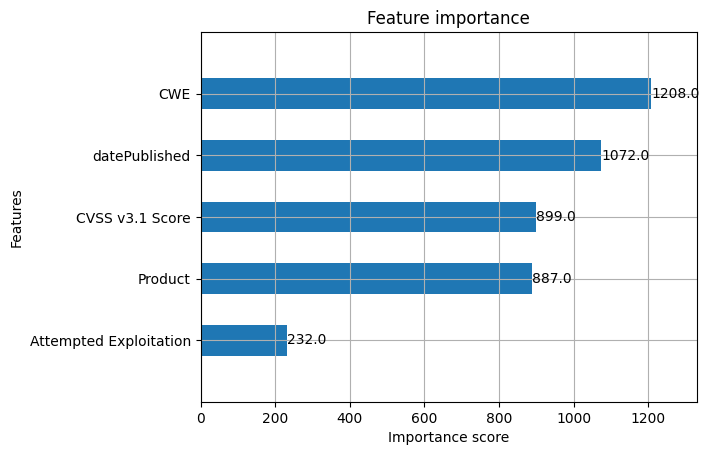

In [12]:

xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=10, height=0.5)


In [13]:
import pandas as pd

results_df = pd.DataFrame({
    "Actual EPSS": y_test.values,
    "Predicted EPSS": y_pred
})

results_df["Error"] = results_df["Actual EPSS"] - results_df["Predicted EPSS"]

print(results_df.head(100))
print(X.std())
import pandas as pd


pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 6)


results_df = pd.DataFrame({
    "Actual EPSS": y_test.values,
    "Predicted EPSS": y_pred
})

results_df["Error"] = results_df["Actual EPSS"] - results_df["Predicted EPSS"]


print(results_df.head(100))


print(X.std(numeric_only=True))



    Actual EPSS  Predicted EPSS     Error
0       0.00037        0.000351  0.000019
1       0.00288        0.344557 -0.341677
2       0.00016        0.000318 -0.000158
3       0.00040        0.000359  0.000041
4       0.00034        0.000359 -0.000019
5       0.00037        0.000388 -0.000018
6       0.22360        0.345610 -0.122010
7       0.53255        0.056453  0.476097
8       0.00040        0.086674 -0.086274
9       0.00034        0.000359 -0.000019
10      0.00029        0.000359 -0.000069
11      0.00034        0.000119  0.000221
12      0.03327        0.501144 -0.467874
13      0.01259        0.062511 -0.049921
14      0.00034        0.000351 -0.000011
15      0.00037        0.000351  0.000019
16      0.02175        0.009925  0.011825
17      0.92099        0.452653  0.468337
18      0.00040        0.000119  0.000281
19      0.00016        0.000318 -0.000158
20      0.24734        0.004576  0.242764
21      0.00029        0.000351 -0.000061
22      0.00036        0.000455 -0

In [14]:
correlation = results_df.corr().loc["Actual EPSS", "Predicted EPSS"]
print(f"Correlation between actual and predicted EPSS: {correlation:.4f}")


Correlation between actual and predicted EPSS: 0.5802


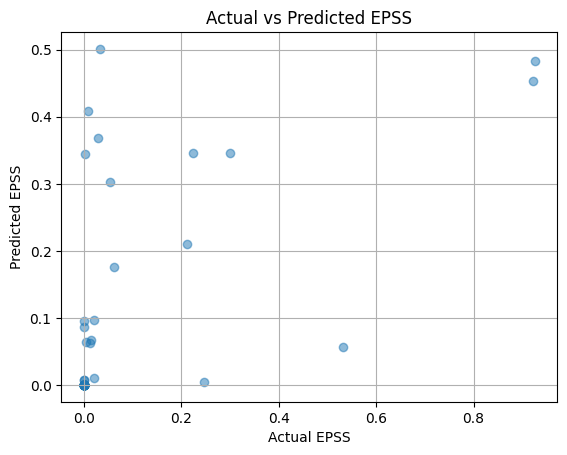

In [15]:
import matplotlib.pyplot as plt

plt.scatter(results_df["Actual EPSS"], results_df["Predicted EPSS"], alpha=0.5)
plt.xlabel("Actual EPSS")
plt.ylabel("Predicted EPSS")
plt.title("Actual vs Predicted EPSS")
plt.grid(True)
plt.show()


In [16]:

results = pd.DataFrame({
    'Actual EPSS': y_test,
    'Predicted EPSS': y_pred
})


results['Error'] = results['Predicted EPSS'] - results['Actual EPSS']


results = results[~((results['Actual EPSS'] == 0.01757) & (results['Predicted EPSS'] == 0.882923))]


In [17]:
import pandas as pd
import numpy as np


results_df = pd.DataFrame({
    "Actual EPSS": y_test.values,
    "Predicted EPSS": y_pred
})

# loss function: mean absolute error.
epsilon = 1e-8  # to avoid division by zero
results_df["Similarity %"] = 100 - (
    200 * abs(results_df["Predicted EPSS"] - results_df["Actual EPSS"]) /
    (abs(results_df["Predicted EPSS"]) + abs(results_df["Actual EPSS"]) + epsilon)
)


# results_df["Similarity %"] = results_df["Similarity %"].clip(lower=0, upper=100)


print(results_df.head(10))
print(f"Average Similarity Percentage: {results_df['Similarity %'].mean():.2f}%")




   Actual EPSS  Predicted EPSS  Similarity %
0      0.00037        0.000351     94.624363
1      0.00288        0.344557    -96.684286
2      0.00016        0.000318     33.956660
3      0.00040        0.000359     89.170017
4      0.00034        0.000359     94.590234
5      0.00037        0.000388     95.224184
6      0.22360        0.345610     57.130175
7      0.53255        0.056453    -61.662040
8      0.00040        0.086674    -98.162457
9      0.00034        0.000359     94.590234
Average Similarity Percentage: 36.16%


In [18]:
import os
import pandas as pd

folder_path = '31xxx'  # e.g. 'C:/Users/you/Documents/json_data'

json_files = [os.path.splitext(f)[0] for f in os.listdir(folder_path) if f.endswith('.json')]

df = pd.DataFrame(json_files, columns=['File Name'])

df.to_excel('json_filenames.xlsx', index=False)

print("File names (without .json) saved to json_filenames.xlsx")


File names (without .json) saved to json_filenames.xlsx
